# Application - régression linéaire
Pour prendre en main l'ensemble des outils, on propose de réaliser une régression linéaire par deux méthodes : 
- en utilisant directement scikit-learn
- en résolvant le système aux équations normales (voir cours analyse numérique)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

!python3 -m  pip install --user sympy

from sympy import init_printing, Matrix, symbols
from IPython.display import Image
from warnings import filterwarnings

init_printing(use_latex = 'mathjax')
filterwarnings('ignore')


On se donne un ensemble de points du plan, on souhaite trouver la droite qui passe au mieux par ces points.
Soit par exemple les points $(1,1)^T, (2,2)^T, (3,2)^T$

In [23]:
t = np.array([1, 2, 3]).reshape((-1, 1))
y = np.array([1,2,2])

## Approche moindres carrés - rappels

Une équation de droite est de la forme
$$ y=a+b{t} $$
et on demande à ce que les points passent par cette droite
$$ a+b=1 \\ a+2b = 2 \\ a+3b=2 $$

Si c'est le cas, le système a une solution. Sinon, cela veut dire que $\begin{bmatrix} 1\\2\\2\end{bmatrix}\notin Im(A)$ avec $A=\begin{bmatrix} 1&1\\1&2\\1&3\end{bmatrix}$

$$ \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}\begin{bmatrix} a \\ b \end{bmatrix}=\begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix} $$
On résout alors 
$$ { A }^{ T }A { x } ={ A }^{ T } y$$
avec pour solution
$$ \hat { x } ={ \left( { A }^{ T }A \right)  }^{ -1 }{ A }^{ T }y $$

En pratique on utilise aussi la décomposition $QR$ de $A$ et on résout $Rx=Q^Ty$

Ecrire la résolution de ce problème en `numpy` par le système aux équations normales et par la décomposition QR. Pour cette dernière, on pourra utiliser la fonction [qr](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html).

In [28]:
A = [[1 ,1],[1,2],[1,3]]
A = np.array(A)
x = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,y))
print("Le système aux équations normales donne : ",x)
Q, R = np.linalg.qr(A)
x = np.linalg.solve(R,np.dot(Q.T,y))
print("QR donne : ",x)

Le système aux équations normales donne :  [0.66666667 0.5       ]
QR donne :  [0.66666667 0.5       ]


## Utilisation de sklearn
À l'aide de la fonction [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), résolvez le problème de régression linéaire.

In [12]:
from sklearn.linear_model import LinearRegression
droite = LinearRegression()
droite.fit(t,y)

print("droite : y = %f + %f t" %(droite.intercept_,droite.coef_))




droite : y = 0.666667 + 0.500000 t


## Affichage
Afficher avec matplotlib le résultat de votre régression

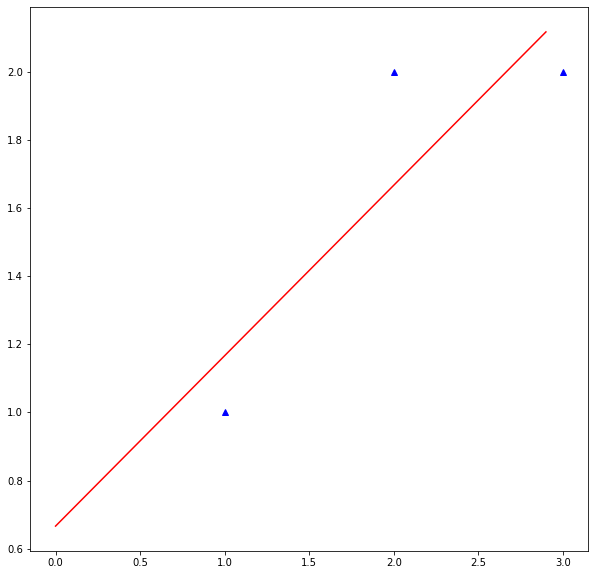

In [18]:
plt.figure(figsize=(10,10))
plt.plot(t,y, 'b^')
x = np.arange(0, 3, 0.1)
plt.plot(x,droite.intercept_+droite.coef_*x,'r-')

